In [2]:
import pandas as pd
import torch
import numpy as np

In [3]:
diatoms = pd.read_csv('DataDiatomGNN_GTstudentprojectGT/DiatomInventories_GTstudentproject.csv', sep=';')
info = pd.read_csv('DataDiatomGNN_GTstudentprojectGT/PressureStatus_GTstudentproject.csv', sep=';')
info.head()


,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Nitrogencompounds_Status1Y,Nitrogencompounds_Status180D,Nitrogencompounds_Status90D,Nitrates_Status1Y,Nitrates_Status180D,Nitrates_Status90D,Phosphorouscompounds_Status1Y,...,OrganicMatter_Status90D,SuspendedMatter_Status1Y,SuspendedMatter_Status180D,SuspendedMatter_Status90D,OrganicMicropollutants_Status1Y,OrganicMicropollutants_Status180D,OrganicMicropollutants_Status90D,MineralMicropollutants_Status1Y,MineralMicropollutants_Status180D,MineralMicropollutants_Status90D
0,S02000008_20170703,S02000008,2017-07-03,Good,Good,Good,Moderate,Moderate,Moderate,Good,...,Bad,High,High,High,Good,Good,Good,Good,Good,Good
1,S02000008_20200708,S02000008,2020-07-08,Good,Good,Good,Moderate,Moderate,Moderate,Moderate,...,Bad,High,High,High,Good,Good,Good,Good,Good,Good
2,S02000010_20070906,S02000010,2007-09-06,Good,Good,Good,Good,Good,Good,High,...,Bad,High,High,High,Moderate,Moderate,Moderate,Good,Good,Good
3,S02000010_20080811,S02000010,2008-08-11,Good,Good,Good,Good,Good,Good,High,...,Bad,High,High,High,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate
4,S02000010_20090721,S02000010,2009-07-21,Good,Good,Good,Good,Good,Good,Good,...,Bad,High,High,High,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate


In [4]:
# add one hot encoding to diatoms
diatoms['onehot'] = pd.Categorical(diatoms['TaxonCode']).codes

In [5]:
import pickle as pkl
diatoms_per_sampling_operation = pkl.load(open('diatoms_per_sampling_operation.pkl', 'rb'))

In [6]:
print(diatoms_per_sampling_operation['S02000008_20170703'])

         onehot  Abundance_pm
32318        69      7.407407
68603        85     88.888889
129441      124      2.469136
194448      176      4.938272
222251      191    187.654321
274455      248      2.469136
292708      294     44.444444
646505      919      4.938272
770249     1137      2.469136
792780     1149      2.469136
837637     1202     32.098765
875360     1203      4.938272
973744     1384    261.728395
1032167    1432    283.950617
1079745    1477     19.753086
1306969    1720      2.469136
1364330    1934      7.407407
1449906    2033      7.407407
1488642    2065     14.814815
1612890    2285     17.283951


In [7]:
pressures_per_sampling_operation = pd.read_csv('DataDiatomGNN_GTstudentprojectGT/PressureStatus_GTstudentproject.csv', sep=';')
pressures_per_sampling_operation = pressures_per_sampling_operation.drop_duplicates(subset=['SamplingOperations_code'])
# make pressuers_per_sampling_operation a dictionary with sampling operation as key
pressures_per_sampling_operation = pressures_per_sampling_operation.set_index('SamplingOperations_code').to_dict(orient='index')

In [8]:
print(pressures_per_sampling_operation['S02000008_20170703'])

{'CodeSite_SamplingOperations': 'S02000008', 'Date_SamplingOperation': '2017-07-03', 'Nitrogencompounds_Status1Y': 'Good', 'Nitrogencompounds_Status180D': 'Good', 'Nitrogencompounds_Status90D': 'Good', 'Nitrates_Status1Y': 'Moderate', 'Nitrates_Status180D': 'Moderate', 'Nitrates_Status90D': 'Moderate', 'Phosphorouscompounds_Status1Y': 'Good', 'Phosphorouscompounds_Status180D': 'Good', 'Phosphorouscompounds_Status90D': 'Moderate', 'Acidification_Status1Y': 'High', 'Acidification_Status180D': 'High', 'Acidification_Status90D': 'High', 'PAH_Status1Y': 'Unassessed', 'PAH_Status180D': 'Unassessed', 'PAH_Status90D': 'Unassessed', 'OrganicMatter_Status1Y': 'Bad', 'OrganicMatter_Status180D': 'Bad', 'OrganicMatter_Status90D': 'Bad', 'SuspendedMatter_Status1Y': 'High', 'SuspendedMatter_Status180D': 'High', 'SuspendedMatter_Status90D': 'High', 'OrganicMicropollutants_Status1Y': 'Good', 'OrganicMicropollutants_Status180D': 'Good', 'OrganicMicropollutants_Status90D': 'Good', 'MineralMicropollutants

In [9]:
sampling_op_to_tensor = {}
valid_ys = ["Nitrogencompounds_Status1Y","Nitrogencompounds_Status180D","Nitrogencompounds_Status90D","Nitrates_Status1Y","Nitrates_Status180D","Nitrates_Status90D","Phosphorouscompounds_Status1Y","Phosphorouscompounds_Status180D","Phosphorouscompounds_Status90D","Acidification_Status1Y","Acidification_Status180D","Acidification_Status90D","PAH_Status1Y","PAH_Status180D","PAH_Status90D","OrganicMatter_Status1Y","OrganicMatter_Status180D","OrganicMatter_Status90D","SuspendedMatter_Status1Y","SuspendedMatter_Status180D","SuspendedMatter_Status90D","OrganicMicropollutants_Status1Y","OrganicMicropollutants_Status180D","OrganicMicropollutants_Status90D","MineralMicropollutants_Status1Y","MineralMicropollutants_Status180D","MineralMicropollutants_Status90D"]
y_map = {"High": 0, "Good": 1, "Moderate": 2, "Poor": 3, "Bad": 4, "Unassessed": -1}
for key in diatoms_per_sampling_operation:
    scaled_onehot = torch.zeros((diatoms['onehot'].max()+1))
    one_hot = torch.zeros((diatoms['onehot'].max()+1))
    scaled_onehot[diatoms_per_sampling_operation[key]['onehot'].to_list()] = torch.tensor(diatoms_per_sampling_operation[key]['Abundance_pm'].to_list())
    one_hot[diatoms_per_sampling_operation[key]['onehot'].to_list()] = 1
    ys_list = []
    skip = False
    for y in valid_ys:
        ys_list.append(y_map[pressures_per_sampling_operation[key][y]])
    sampling_op_to_tensor[key] = (scaled_onehot, one_hot, torch.tensor(ys_list))
with open('sampling_op_to_tensor.pkl', 'wb') as f:
    pkl.dump(sampling_op_to_tensor, f)

In [10]:
sampling_op_to_tensor = pkl.load(open('sampling_op_to_tensor.pkl', 'rb'))
from torch.utils.data import Dataset, DataLoader

class DiatomDataset(Dataset):
    def __init__(self, sampling_op_to_tensor, x='scaled_onehot', y='Nitrogencompounds_Status1Y'):
        self.sampling_op_to_tensor = sampling_op_to_tensor.copy()
        self.keys = list(self.sampling_op_to_tensor.keys())
        self.x = 0 if x == 'scaled_onehot' else 1
        self.y = [valid_ys.index(y)]
        temp = []
        for key in self.keys:
            if self.sampling_op_to_tensor[key][2][self.y].item() == -1:
                continue
            else:
                temp.append(key)
        print('Skipped', len(self.keys) - len(temp), 'samples')
        self.keys = temp

        
    def __len__(self):
        return len(self.keys)
    
    def __getitem__(self, idx):
        key = self.keys[idx]
        return self.sampling_op_to_tensor[key][self.x], self.sampling_op_to_tensor[key][2][self.y].item()

dataset = DiatomDataset(sampling_op_to_tensor, x='scaled_onehot', y='Nitrates_Status1Y')
y_dist = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
for i in range(len(dataset)):
    y_dist[dataset[i][1]] += 1
print('Y distribution (0 is High, 4 is Bad):', y_dist)

Skipped 593 samples
Y distribution (0 is High, 4 is Bad): {0: 4615, 1: 19291, 2: 16742, 3: 7412, 4: 578}


In [11]:
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

class Net(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim_1, hidden_dim_2, hidden_dim_3):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim_1)
        self.fc2 = nn.Linear(hidden_dim_1, hidden_dim_2)
        self.fc3 = nn.Linear(hidden_dim_2, hidden_dim_3)
        self.fc4 = nn.Linear(hidden_dim_3, output_dim)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)         
        return x

input_dim = diatoms['onehot'].max()+1
output_dim = 5

model = Net(input_dim, output_dim, 4096, 1024, 256)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# split the dataset into training and test
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

for epoch in range(10):
    correct = 0
    total = 0
    for i, data in enumerate(tqdm(train_dataloader)):
        x, y = data
        optimizer.zero_grad()
        output = model(x.float())
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(output.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()
        if i == len(train_dataloader)-1:
            print(f'Epoch {epoch}, Loss {loss.item()}, Accuracy {100 * correct / total}, {i}/{len(train_dataloader)}')

print('Finished Training')

100%|██████████| 1216/1216 [00:31<00:00, 38.22it/s]


Epoch 0, Loss 1.0809358358383179, Accuracy 56.73605756874839, 1215/1216


100%|██████████| 1216/1216 [00:29<00:00, 41.32it/s]


Epoch 1, Loss 0.6300463080406189, Accuracy 61.27730660498587, 1215/1216


100%|██████████| 1216/1216 [00:30<00:00, 39.78it/s]


Epoch 2, Loss 0.7662675380706787, Accuracy 64.33564636340273, 1215/1216


100%|██████████| 1216/1216 [00:30<00:00, 39.98it/s]


Epoch 3, Loss 0.696776807308197, Accuracy 67.38113595476742, 1215/1216


100%|██████████| 1216/1216 [00:28<00:00, 42.25it/s]


Epoch 4, Loss 0.6397516131401062, Accuracy 71.14109483423285, 1215/1216


100%|██████████| 1216/1216 [00:29<00:00, 41.89it/s]


Epoch 5, Loss 0.5902994871139526, Accuracy 74.56180930352095, 1215/1216


100%|██████████| 1216/1216 [00:29<00:00, 41.83it/s]


Epoch 6, Loss 0.7557489275932312, Accuracy 77.3502955538422, 1215/1216


100%|██████████| 1216/1216 [00:29<00:00, 40.64it/s]


Epoch 7, Loss 0.3967534899711609, Accuracy 80.07196093549216, 1215/1216


100%|██████████| 1216/1216 [00:34<00:00, 35.44it/s]


Epoch 8, Loss 0.4022780954837799, Accuracy 82.68311488049345, 1215/1216


100%|██████████| 1216/1216 [00:33<00:00, 36.54it/s]


Epoch 9, Loss 0.48539721965789795, Accuracy 84.36134669750707, 1215/1216
Finished Training


100%|██████████| 304/304 [00:01<00:00, 278.75it/s]

Final Test Accuracy 61.6467927631579


100%|██████████| 304/304 [00:01<00:00, 194.67it/s]


Final Test Accuracy 61.6467927631579


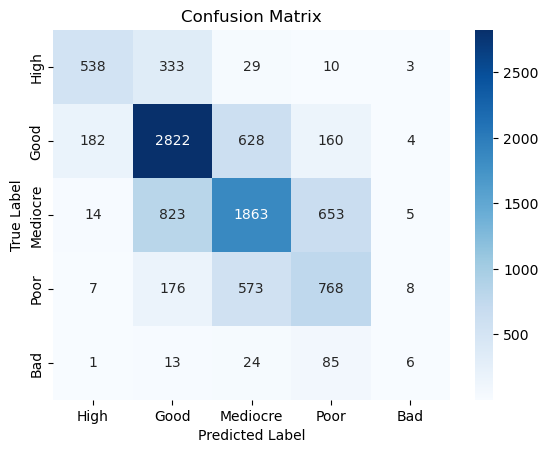

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
correct = 0
total = 0
predictions = []
true_classes = []
for i, data in enumerate(tqdm(test_dataloader)):
    x, y = data
    output = model(x.float())
    _, predicted = torch.max(output.data, 1)
    predictions.extend(predicted)
    true_classes.extend(y)
    total += y.size(0)
    correct += (predicted == y).sum().item()
print(f'Final Test Accuracy {100 * correct / total}')
conf_matrix = confusion_matrix(true_classes, predictions)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['High', 'Good', 'Mediocre', 'Poor', 'Bad'],
            yticklabels=['High', 'Good', 'Mediocre', 'Poor', 'Bad'])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()